In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np

In [3]:
import keras
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
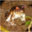

In [6]:
x_train[0]

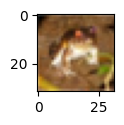

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig=plt.figure(figsize=(1,1))
plt.imshow(x_train[0])

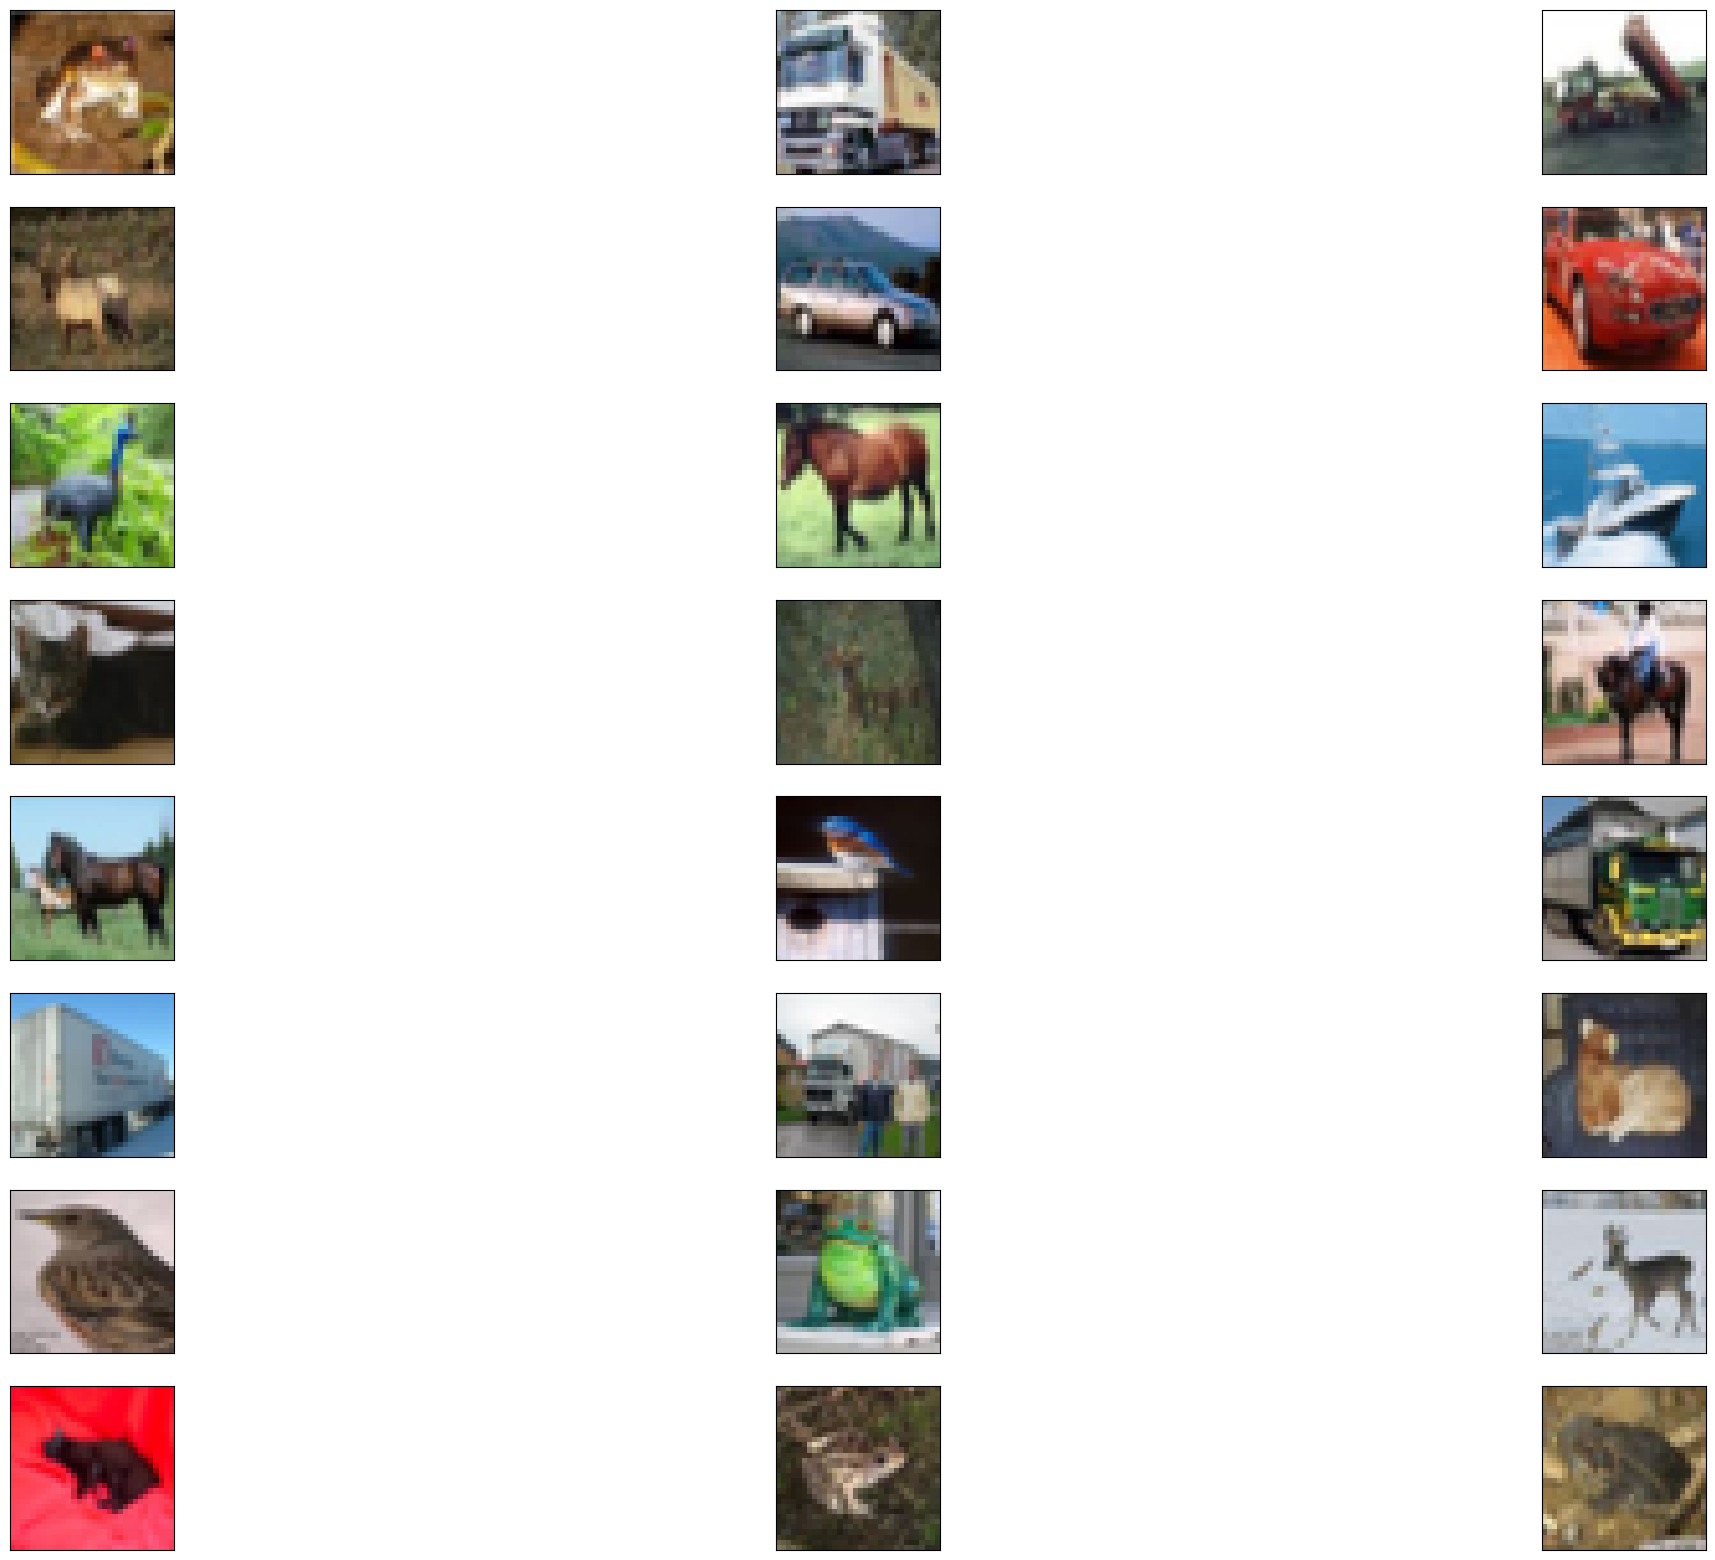

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig=plt.figure(figsize=(28,20))
for i in range(24):
  ax=fig.add_subplot(8,3,i+1, xticks=[],yticks=[])
  ax.imshow(x_train[i])

In [9]:
x_train=x_train.astype('float32')/255
x_test= x_test.astype('float32')/255

In [10]:
pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56439 sha256=b61af7a115b1bded237f5c0797ca92fbdd5201689a9df7590fc55c472b29ad6b
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [11]:
y_train.shape

(50000, 1)

In [12]:
y_train.ndim

2

In [13]:
y_test.shape

(10000, 1)

In [14]:
number_of_class=len(np.unique(y_train))
number_of_class

10

In [15]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [16]:
y_train.shape

(50000, 1)

In [17]:
y_train.ndim

2

In [18]:
from keras.utils import to_categorical
num_classes =len(np.unique(y_train))

y_train=keras.utils.to_categorical(y_train,num_classes=10)
y_test=keras.utils.to_categorical(y_test,num_classes=10)

In [19]:
y_train

(50000, 10)

In [20]:
(x_train,x_valid)=x_train[5000:],x_train[:5000]
(y_train,y_valid)=y_train[5000:],y_train[:5000]

print('x_train shape:',x_train.shape)


print(x_train.shape[0],'train sample')
print(x_test.shape[0],'test sample')
print(x_valid.shape[0],'validation sample')

x_train shape: (45000, 32, 32, 3)
45000 train sample
10000 test sample
5000 validation sample


In [21]:
y_train[30]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [22]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu',input_shape=(32, 32, 3)))

model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(500, activation='relu'))

model.add(Dropout(0.3))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 64)          0

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
from keras.callbacks import ModelCheckpoint

# train the model
checkpointer = ModelCheckpoint(filepath='model_weights_best.hdf5',verbose=2, save_best_only=True)

hist = model.fit(x_train, y_train, batch_size=300, epochs=15,validation_data=(x_valid, y_valid), callbacks=[checkpointer],verbose=1, shuffle=True)

Epoch 1/15
150/150 [==============================] - ETA: 0s - loss: 1.0066 - accuracy: 0.6447
Epoch 1: val_loss improved from inf to 0.94670, saving model to model_weights_best.hdf5
150/150 [==============================] - 44s 294ms/step - loss: 1.0066 - accuracy: 0.6447 - val_loss: 0.9467 - val_accuracy: 0.6558
Epoch 2/15


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


150/150 [==============================] - ETA: 0s - loss: 0.9633 - accuracy: 0.6568
Epoch 2: val_loss improved from 0.94670 to 0.91929, saving model to model_weights_best.hdf5
150/150 [==============================] - 44s 294ms/step - loss: 0.9633 - accuracy: 0.6568 - val_loss: 0.9193 - val_accuracy: 0.6722
Epoch 3/15
150/150 [==============================] - ETA: 0s - loss: 0.9320 - accuracy: 0.6690
Epoch 3: val_loss improved from 0.91929 to 0.88090, saving model to model_weights_best.hdf5
150/150 [==============================] - 45s 298ms/step - loss: 0.9320 - accuracy: 0.6690 - val_loss: 0.8809 - val_accuracy: 0.6776
Epoch 4/15
150/150 [==============================] - ETA: 0s - loss: 0.9075 - accuracy: 0.6792
Epoch 4: val_loss improved from 0.88090 to 0.87252, saving model to model_weights_best.hdf5
150/150 [==============================] - 44s 296ms/step - loss: 0.9075 - accuracy: 0.6792 - val_loss: 0.8725 - val_accuracy: 0.6862
Epoch 5/15
150/150 [=========================

In [28]:
model.load_weights('model_weights_best.hdf5')

In [29]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

313/313 [==============================] - 6s 19ms/step


In [30]:
y_test[56]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [31]:
y_test[56]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [32]:
np.argmax(y_hat[56])

7

In [33]:
score = model.evaluate(x_test, y_test, verbose=0)
score

[0.7539107203483582, 0.7347000241279602]

In [38]:
from google.colab.patches import cv2_imshow
import os, json, cv2, random



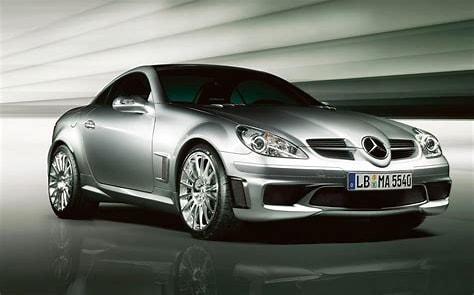

In [39]:
im = cv2.imread("/content/th.jpeg")
cv2_imshow(im)

In [40]:
im.shape

(295, 474, 3)

In [41]:
import tensorflow as tf
img = tf.keras.utils.load_img("/content/th.jpeg", target_size=(32,32,3)
)

In [42]:
img_array = tf.keras.utils.img_to_array(img)
img_array

array([[[181., 182., 174.],
        [180., 181., 173.],
        [181., 181., 173.],
        ...,
        [ 89., 100.,  83.],
        [ 87., 100.,  82.],
        [ 87.,  98.,  81.]],

       [[188., 189., 181.],
        [189., 190., 182.],
        [190., 190., 182.],
        ...,
        [103., 114.,  97.],
        [100., 113.,  95.],
        [ 99., 110.,  93.]],

       [[204., 204., 196.],
        [202., 202., 194.],
        [203., 203., 195.],
        ...,
        [ 94., 108.,  91.],
        [ 40.,  54.,  39.],
        [ 53.,  67.,  52.]],

       ...,

       [[ 47.,  52.,  45.],
        [ 52.,  55.,  48.],
        [ 52.,  55.,  48.],
        ...,
        [ 32.,  42.,  33.],
        [ 33.,  43.,  34.],
        [ 35.,  40.,  33.]],

       [[ 38.,  44.,  34.],
        [ 37.,  43.,  33.],
        [ 38.,  44.,  34.],
        ...,
        [ 33.,  43.,  32.],
        [ 33.,  43.,  32.],
        [ 31.,  41.,  32.]],

       [[ 35.,  38.,  27.],
        [ 37.,  40.,  29.],
        [ 35.,  

In [43]:
img_array.shape

(32, 32, 3)

In [44]:
img_array = tf.expand_dims(img_array, 0)  # Create batch axis
img_array.shape

TensorShape([1, 32, 32, 3])

In [45]:




predictions = model.predict(img_array)
score = predictions
score

1/1 [==============================] - 0s 45ms/step


array([[0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 9.833069e-23]], dtype=float32)

In [46]:
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [47]:
cifar10_labels[7]

'horse'

In [48]:
cifar10_labels[np.argmax(score)]

'automobile'